Douglas Rachford Proximal Splitting
===================================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


This numerical tour presents the Douglas-Rachford (DR) algorithm to
minimize the sum of two simple functions. It shows an
application to
reconstruction of exactly sparse signal from noiseless measurement using
$\ell^1$ minimization.

In [1]:
using PyPlot

Douglas-Rachford Algorithm
--------------------------
The Douglas-Rachford (DR) algorithm is an iterative scheme to minimize
functionals of the form
$$ \umin{x} f(x) + g(x) $$
where $f$ and $g$ are convex functions, of which one is able to
compute the proximity operators.

This algorithm was introduced in

P. L. Lions and B. Mercier
"Splitting Algorithms for the Sum of Two Nonlinear Operators,"
_SIAM Journal on Numerical Analysis_
vol. 16, no. 6, 1979,


as a generalization of an algorithm introduced by Douglas and Rachford in
the case of quadratic minimization (which corresponds to solving
a positive definite linear system).


To learn more about this algorithm, you can read:


Patrick L. Combettes and Jean-Christophe Pesquet,
"Proximal Splitting Methods in Signal Processing,"
in: _Fixed-Point Algorithms for Inverse
Problems in Science and Engineering_, New York: Springer-Verlag, 2010.



The Douglas-Rachford algorithm takes an arbitrary element $s^{(0)}$, a parameter $\ga>0$, a relaxation parameter $0<\rho<2$ and iterates, for $k=1,2,\ldots$
$$
\left|\begin{array}{l}
x^{(k)} = \mathrm{prox}_{\gamma f} (s^{(k-1)} )\\
s^{(k)} = s^{(k-1)}+\rho\big(\text{prox}_{\ga g}( 2x^{(k)}-s^{(k-1)})-x^{(k)}\big).
\end{array}\right.
$$

It is of course possible to inter-change the roles of $f$ and $g$,
which defines a different algorithm.

The iterates $x^{(k)}$ converge to a solution $x^\star$ of the problem, i.e. a minimizer of $f+g$.

Compressed Sensing Acquisition
------------------------------
Compressed sensing acquisition corresponds to a random projection
$y=Ax^\sharp$ of a signal $x^\sharp$ on a
few linear vectors (the rows of the matrix $A$). For the recovery of $x^\sharp$ to be possible, this vector is supposed
to be sparse in some basis. Here, we suppose $x^\sharp$ itself is sparse.

We initialize the random number generator for reproducibility.

In [2]:
srand(0);

Dimension of the problem.

In [3]:
N = 400;

Number of measurements.

In [4]:
P = Int(round(N/4))

100

We create a random Gaussian measurement matrix $A$.

In [5]:
A = randn(P, N) ./ sqrt(P)

100×400 Array{Float64,2}:
  0.0679107   -0.0682832  -0.050376    …   0.29911       0.254127  
  0.0828413    0.0156483   0.00646768      0.0065698     0.202104  
 -0.0353007    0.0140714   0.0907637      -0.0912724     0.0744238 
 -0.0134854   -0.0126612   0.0720839      -0.0435621     0.166798  
  0.0586617   -0.116898   -0.0686564      -0.103057      0.108181  
  0.0297336    0.0634067  -0.0237696   …  -0.0351895    -0.080147  
  0.00649475  -0.099871   -0.103289        0.1587        0.132639  
 -0.0109017    0.102912   -0.180055        0.0525735    -0.118446  
 -0.051421    -0.115751   -0.116446       -0.183929     -0.00756541
  0.157433     0.0533604   0.121158        0.000143597   0.0405142 
 -0.0688907   -0.0308418   0.00927033  …   0.107258      0.054582  
 -0.0762804    0.0985859  -0.12736        -0.0345689    -0.0430195 
  0.0397482   -0.118882    0.126059       -0.031277     -0.0195955 
  ⋮                                    ⋱                           
  0.0174594    0.16157

Sparsity of the signal.

In [6]:
S = 17

17

We begin by generating a $S$-sparse signal $x^\sharp$ with $S$ randomized values.
Since the measurement matrix is random, one does not care about the sign
of the nonzero elements, so we set values equal to one.

In [7]:
sel = randperm(N)
sel = sel[1 : S]   # indices of the nonzero elements of xsharp
xsharp = zeros(N)
xsharp[sel] = 1;

We perform random measurements $y=Ax^\sharp$ without noise.

In [8]:
y = A*xsharp;

Compressed Sensing Recovery with the Douglas-Rachford algorithm
------------------------------------
Compressed sensing recovery corresponds
to solving the inverse problem $y=A x^\sharp$, which is ill posed because
$x^\sharp$ is
higher dimensional than $y$.


The reconstruction can be performed by $\ell^1$ minimization,
which regularizes the problem by exploiting the prior knowledge that the solution is sparse.
$$ x^\star \in \arg\min_x \norm{x}_1 \quad\mbox{s.t.}\quad Ax=y$$
where the $\ell^1$ norm is defined as
$$ \norm{x}_1 = \sum_{n=1}^N \abs{x_n}. $$


This is the minimization of a non-smooth function under affine
constraints. This can be shown to be equivalent to a linear programming
problem, for wich various algorithms can be used (simplex, interior
points). We propose here to use the Douglas-Rachford algorithm.


It is possible to recast this problem as the minimization of $f+g$
where $g(x) = \norm{x}_1$ and $f(x)=\iota_{\Omega}$ where $\Omega =
\enscond{x}{Ax=y}$ is an affine space, and $\iota_\Omega$ is the indicator
function
$$ \iota_\Omega(x) = \choice{ 0 \qifq x \in \Omega, \\ +\infty \qifq x \notin \Omega. } $$


The proximal operator of the $\ell^1$ norm is soft thresholding:
$$ \text{prox}_{\gamma \norm{\cdot}_1}(x)_n = \max\pa{ 0, 1-\frac{\ga}{\abs{x_n}} } x_n. $$

In [9]:
prox_gamma_g = (x, gamma) -> x - x./max(abs(x)./gamma, 1)

(::#1) (generic function with 1 method)

Display the 1-D curve of the thresholding.

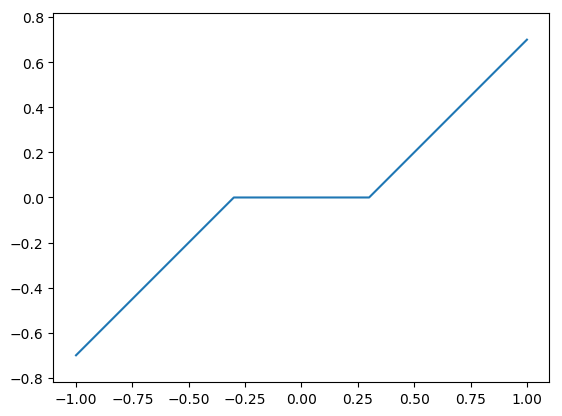

(-1.1,1.1,-0.7699999999999999,0.7699999999999999)

In [10]:
figsize = (9, 6)
t = -1 : 0.001 : 1
plot(t, prox_gamma_g(t, 0.3))
axis("equal")

The proximity operator of $\gamma$ times the indicator function of $\Omega$ is projection onto $\Omega$ 
 and does not depends on $\gamma$.
$$ \mathrm{prox}_{\gamma f}(x)=\mathrm{prox}_{\iota_\Omega}(x)=P_\Omega(x)  = x + A^* (A A^*)^{-1} (y-Ax). $$

In [11]:
pA = pinv(A) # pseudo-inverse. Equivalent to pA = A.T.dot(inv(A.dot(A.T)))
prox_f = (x, y) -> x + pA*(y - A*x)

(::#3) (generic function with 1 method)

We set the values of $\gamma$ and $\rho$.
Try different values to speed up the convergence.

In [12]:
gamma = 0.1 # try 1, 10, 0.1
rho = 1     # try 1, 1.5, 1.9

1

Number of iterations.

In [13]:
nbiter = 700

700

<h3>
 <font color='magenta'>
__Exercise: Implement nbiter iterations of the Douglas-Rachford algorithm.
Keep track of the evolution of the $\ell^1$ norm.__</font></h3>

In [14]:
s = zeros(N)
En_array = zeros(nbiter)
for iter in 1 : nbiter  # iter goes from 1 to nbiter
    # put your code here
    En_array[iter] = maximum(sum(abs(x), 1))
x_restored = x

LoadError: syntax: incomplete: "for" at In[14]:3 requires end


We display the original and the recovered signals.

In [15]:
fig, (subfig1, subfig2) = subplots(1, 2, figsize = (16, 7)) # one figure with two horizontal subfigures
subfig1[:stem](xsharp)
subfig1[:set_ylim](0, 1.1)
subfig2[:stem](x_restored)
subfig2[:set_ylim](0, 1.1)
subfig1[:set_title](L"$x^\sharp$")
subfig2[:set_title](L"$x_\mathrm{restored}$")

LoadError: UndefVarError: x_restored not defined

Since the original signal is highly sparse, it is perfectly recovered.

We display the convergence speed of the $\ell^1$ norm on the first half iterations, in log
scale.

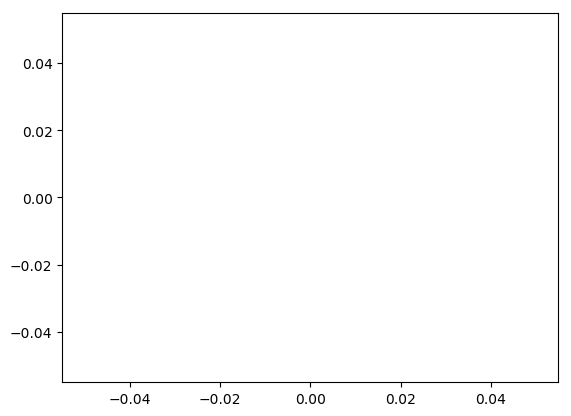

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x333a5ded0>

In [16]:
plot(log10(En_array - minimum(En_array)))

The convergence is linear in practice. Convergence up to machine precision (1e-14 here) is achieved after a few hundreds of iterations.

<h3>
 <font color='magenta'>
__Exercise: test the recovery of a less sparse signal.
What do you observe?__</font></h3>

In [17]:
S = 31
srand(0)
sel = randperm(N)
sel = sel[1 : S]   # indices of the nonzero elements of xsharp
xsharp = zeros(N)
xsharp[sel] = 1

y = A*xsharp

# put your code here

100-element Array{Float64,1}:
  0.11573   
  0.742032  
  1.1382    
  0.0195104 
 -0.0564791 
 -0.303705  
 -0.400856  
  0.131482  
 -0.31011   
 -0.00970144
 -0.0424864 
 -0.0766934 
  0.619124  
  ⋮         
 -0.210507  
  0.502878  
 -0.785536  
 -0.682072  
 -0.991464  
  0.409874  
 -0.938657  
  0.257866  
 -0.129917  
  0.105005  
  0.036563  
  0.0194049 

In [18]:
fig, (subfig1, subfig2) = subplots(1, 2, figsize = (16, 7)) # one figure with two horizontal subfigures
subfig1[:stem](xsharp)
subfig1[:set_ylim](0, 1.1)
subfig2[:stem](x_restored)
subfig1[:set_title](L"$x^\sharp$")
subfig2[:set_title](L"$x_\mathrm{restored}$")

LoadError: UndefVarError: x_restored not defined

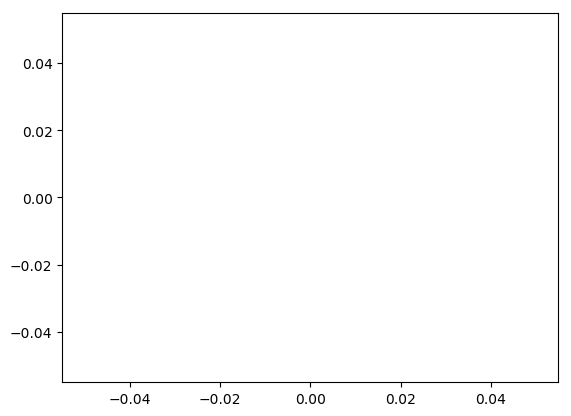

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33444ed90>

In [19]:
plot(log10(En_array - minimum(En_array)))

Convergence is much slower in this setting.